In [47]:
#!pip install lightgbm

In [48]:
#!pip install xgboost 

In [49]:
#!pip install -U imbalanced-learn --user

In [50]:
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Lerarning
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import pickle
sns.set()

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [51]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [52]:
df['Diabetes_binary'].unique()

array([0., 1.])

In [53]:
df.shape

(253680, 22)

In [54]:
df.groupby('Diabetes_binary')['Diabetes_binary'].agg('count')

Diabetes_binary
0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [55]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
                         ...   
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
Length: 22, dtype: object

In [56]:
df['Age'].unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [57]:
x = 0.0
y = int(x)
y

0

In [58]:
df['Diabetes_binary'] = df['Diabetes_binary'].apply(lambda x: int(x))

In [59]:
df['Sex'].dtype

dtype('float64')

In [60]:
for i in df.columns:
    if df[i].dtype =='float64':
        df[i] = df[i].apply(lambda x: int(x))


In [61]:
df.dtypes

Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
                        ...  
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Length: 22, dtype: object

In [62]:
R = df.corr()
R

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,-0.056584,-0.057056,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


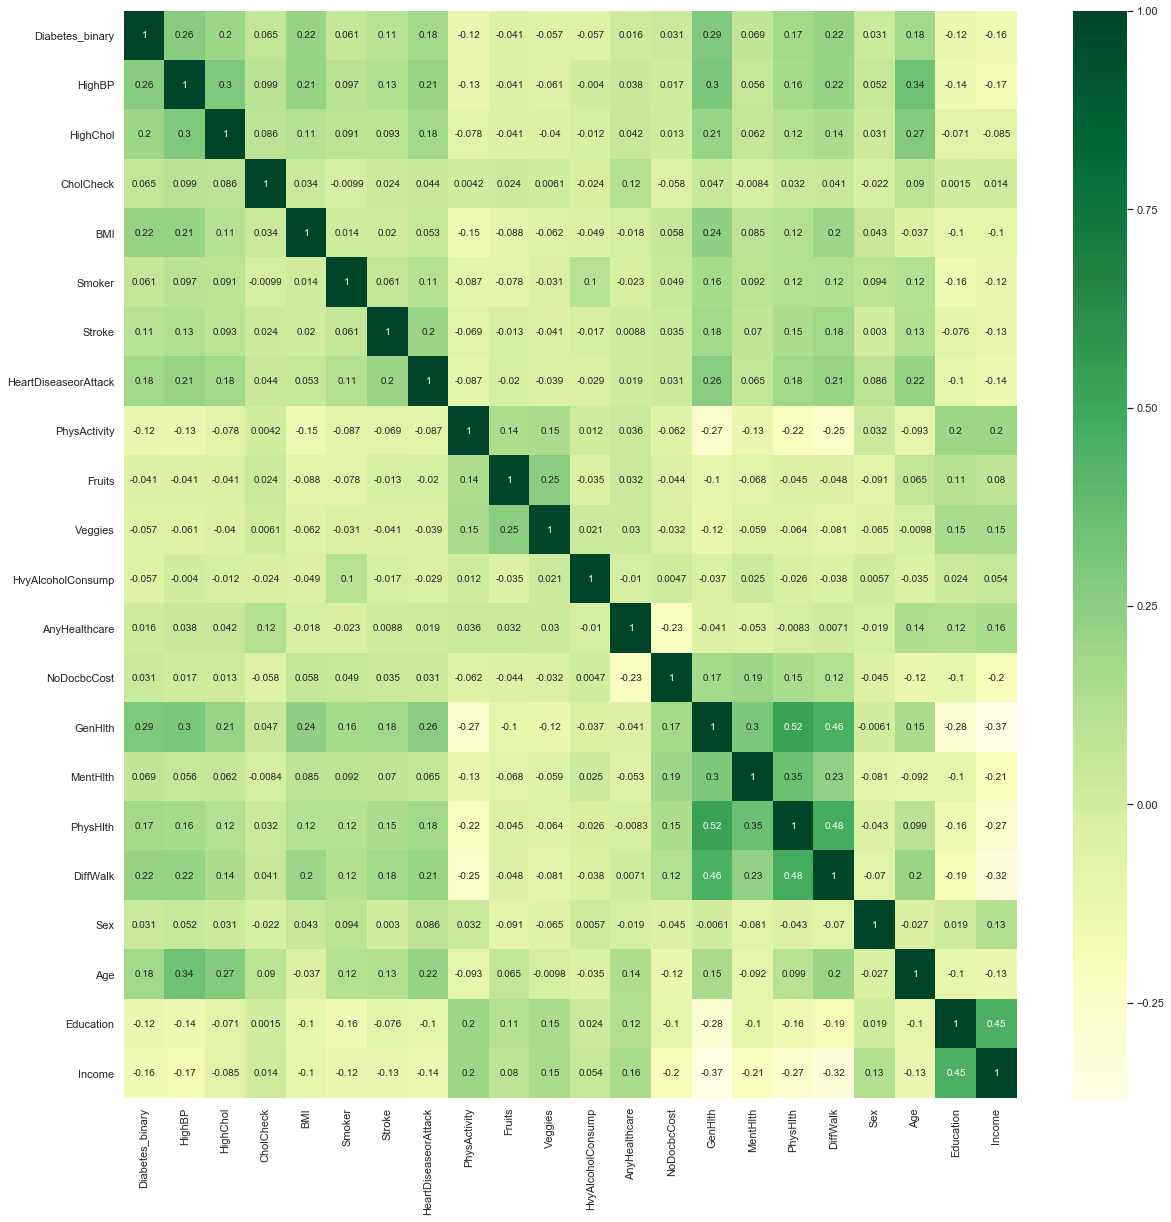

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(R, annot=True, cmap='YlGn')
plt.savefig('heatchart.png')

## Feature Scaling

In [64]:
scaler = StandardScaler()
X = df.drop('Diabetes_binary', axis=1) # Assign all the features of X

y = df['Diabetes_binary'] # Assign the target y variable


In [65]:
y

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         1
9         0
         ..
253670    1
253671    0
253672    0
253673    0
253674    0
253675    0
253676    1
253677    0
253678    0
253679    1
Name: Diabetes_binary, Length: 253680, dtype: int64

In [66]:
#from sklearn.feature_selection import mutual_info_classif

#mutual_info_classif(X,y)

#imp = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)

#imp
#imp.columns = ['Importance']

#imp.sort_values(by='Importance', ascending=False)

In [67]:
#imp[imp['Importance']>=0.03].sort_values(by='Importance', ascending=False)

In [68]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [69]:
X = X[['GenHlth','CholCheck', 'HighBP', 'AnyHealthcare', 'PhysActivity', 'Veggies']]
X.head()

,GenHlth,CholCheck,HighBP,AnyHealthcare,PhysActivity,Veggies
0,5,1,1,1,0,1
1,3,0,0,0,1,0
2,5,1,1,1,0,0
3,2,1,1,1,1,1
4,2,1,1,1,1,1


In [70]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=123)

In [71]:
scaler.fit(X_train)

StandardScaler()

In [72]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# Select the algorithm according to the imput provided
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LR':
        model = LogisticRegression()
    return model

In [74]:
model = model_to_use('LR')
model

LogisticRegression()

In [75]:
# Training the model:
model.fit(X_train, y_train)
model

LogisticRegression()

In [76]:
y_pred = model.predict(X_test)

# Predict probability for test dataset
y_pred_prob = model.predict_proba(X_test)
y_pred_prob = [X[0] for X in y_pred_prob]
print('y predicted: ', y_pred)
print('y probabilty predicted: ', y_pred_prob[:5])

y predicted:  [0 0 0 ... 0 0 0]
y probabilty predicted:  [0.9484086397738819, 0.9568596758163888, 0.9130336264372113, 0.7978387283365834, 0.9720210738788169]


## Model Evaluation
 Get the evaluation metrics to evaluate the performance of model on testing data.

In [ ]:
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score: \n ", accuracy_score(y_actual, y_predicted))
    print("\n AUC Score: \n ", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix: \n ", confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report: \n ", classification_report(y_actual, y_predicted))
    
    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    
    plt.show()

compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prob)


 Accuracy Score: 
  0.8578918322295805

 AUC Score: 
  0.2171835877830042


## Imbalanced Data

In [ ]:
y.value_counts()

In [ ]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)  # or ros.fit_sample(X, y)
y_ros.value_counts()

In [ ]:
X = X_ros
y = y_ros

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def classification_model(X, y):
    X = scaler.fit_transform(X)
    
    #Split the dataset into the training set and testing set
    X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=0)
    
    
    #Training the MODEL:
    model.fit(X_train, y_train)
    
    #Predict class for test dataset
    y_pred = model.predict(X_test)
    
    #Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]
    
    #Compute Evaluation metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prob)
    
    return model
    

In [ ]:
classification_model(X_ros, y_ros)

##  Hyperparameter tuning

In [ ]:
#Defining the parameters grid for Decision Tree
param_grid_decision_tree = {'criterion':['gini', 'entropy'],
                           'max_depth':[10,15,20,30,40,50],
                           'min_samples_leaf':[1,2,5]}

#Defining the parameters grid for Random Forest
param_grid_random_forest = {'max_depth':[10,20,40],
                           'n_estimator':[100,200,300],
                           'min_samples_leaf':[1,2,5]}

#Defining the parameters grid for XGBoost
param_grid_xgb = {'min_child_weight':[1,5,10],
                  'gamma':[0,1],
                  'max_depth':[5,10],
                 'learning_rate':[0.05, 0.1]}

#Defining the parameters grid for LGBM
#param_grid_lgbm = {'n_estimator':[100,200],
                   #'num_leaves':[256, 128],
                   #'max_depth':[5,8,10],
                 #'learning_rate':[0.05, 0.1]}


In [ ]:
def param(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
        param_grid = param_grid_decision_tree
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
        param_grid = param_grid_random_forest
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
        param_grid = param_grid_xgb
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
        param_grid = param_grid_lgbm
    return param_grid
# Note that there is no Logistic Regression in the list of models. This is because optimizing Logistic Regression is entirely different way


In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model.get_params().keys()

In [ ]:
grid = GridSearchCV(model, param_grid_decision_tree, refit = True, verbose=3, n_jobs=-1)

grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test)

#Predict probability for test dataset

y_pred_prob = grid.predict_proba(X_test)
y_pred_prob = [x[1] for x in y_pred_prob]
print("Y predicted : ", y_pred)
print("Y probability predicted : ", y_pred_prob[:5])

In [ ]:
compute_evaluation_metric(grid, X_test, y_test, y_pred, y_pred_prob)

### Saving your model

In [ ]:
import pickle


In [ ]:
# Save the model to disk

pickle.dump(model, open('diabetes_model.pkl', 'wb'))

pickle.dump(scaler, open('scaler2.pkl', 'wb'))

## Creating Prediction Pipeline